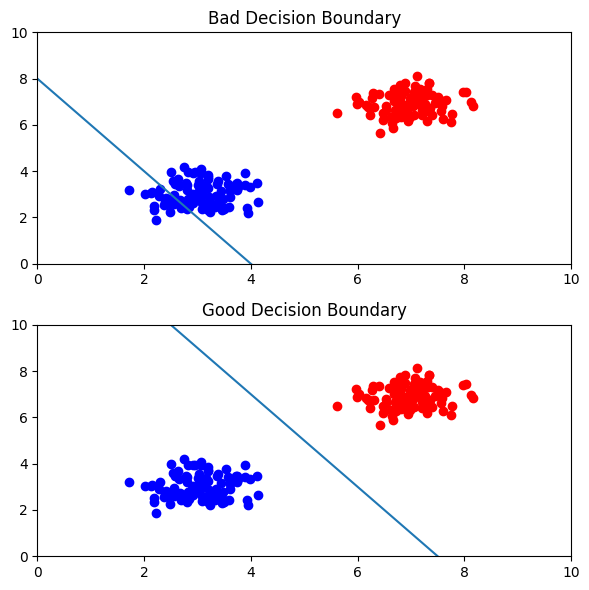

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
np.random.seed(0)
x_1 = np.random.normal(3, 0.5, 100)  # Cluster centered around (3,3)
y_1 = np.random.normal(3, 0.5, 100)

x_2 = np.random.normal(7, 0.5, 100)  # Cluster centered around (7,7)
y_2 = np.random.normal(7, 0.5, 100)

# Create figure and first subplot
fig, axes = plt.subplots(2, 1, figsize=(6, 6))

# Top Graph: Bad Decision Boundary
ax = axes[0]
ax.set_title('Bad Decision Boundary')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.scatter(x_1, y_1, color="b")
ax.scatter(x_2, y_2, color="r")

# Decision boundary equation: y = intercept + slope * x
intercept_one = 8
slope_one = -2

x_vals = np.array(ax.get_xlim())
y_vals = intercept_one + slope_one * x_vals
ax.plot(x_vals, y_vals, '-')

# Bottom Graph: Good Decision Boundary
ax = axes[1]
ax.set_title('Good Decision Boundary')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.scatter(x_1, y_1, color="b")
ax.scatter(x_2, y_2, color="r")

# Adjusted decision boundary
intercept_two = 15
slope_two = -2

x_vals = np.array(ax.get_xlim())
y_vals = intercept_two + slope_two * x_vals
ax.plot(x_vals, y_vals, '-')

plt.tight_layout()
plt.show()


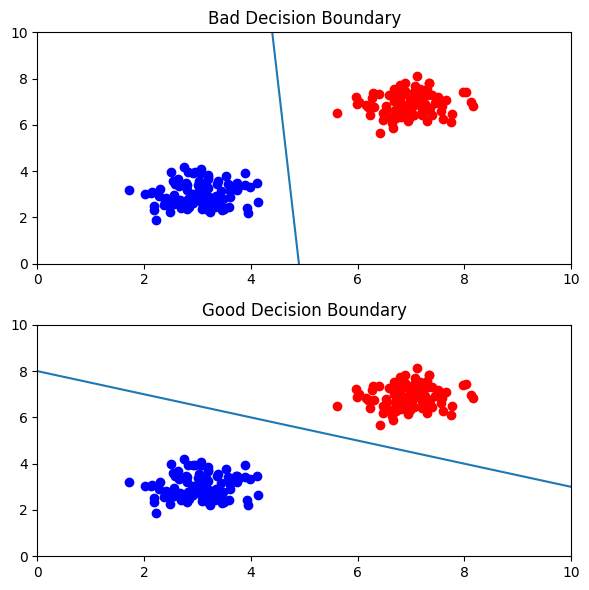

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
np.random.seed(0)
x_1 = np.random.normal(3, 0.5, 100)  # Cluster centered around (3,3)
y_1 = np.random.normal(3, 0.5, 100)

x_2 = np.random.normal(7, 0.5, 100)  # Cluster centered around (7,7)
y_2 = np.random.normal(7, 0.5, 100)

# Create figure and first subplot
fig, axes = plt.subplots(2, 1, figsize=(6, 6))

# Top Graph: Bad Decision Boundary
ax = axes[0]
ax.set_title('Bad Decision Boundary')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.scatter(x_1, y_1, color="b")
ax.scatter(x_2, y_2, color="r")

# Decision boundary equation: y = intercept + slope * x
intercept_one = 98
slope_one = -20

x_vals = np.array(ax.get_xlim())
y_vals = intercept_one + slope_one * x_vals
ax.plot(x_vals, y_vals, '-')

# Bottom Graph: Good Decision Boundary
ax = axes[1]
ax.set_title('Good Decision Boundary')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.scatter(x_1, y_1, color="b")
ax.scatter(x_2, y_2, color="r")

# Adjusted decision boundary
intercept_two = 8
slope_two = -0.5

x_vals = np.array(ax.get_xlim())
y_vals = intercept_two + slope_two * x_vals
ax.plot(x_vals, y_vals, '-')

plt.tight_layout()
plt.show()


## SVC with outliers using margins    

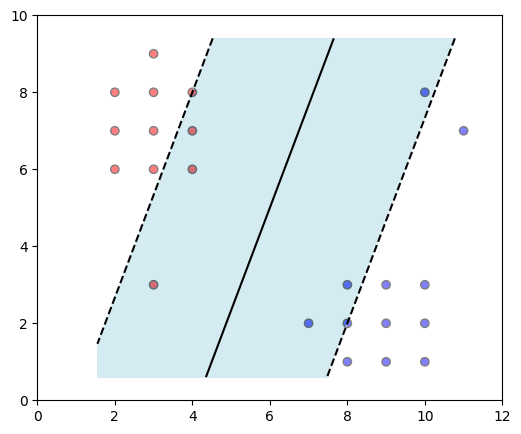

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Define points and labels manually
points = [
    [2, 7], [3, 8], [4, 8], [3, 7], [3, 6], [2, 6], [4, 7], [2, 8], [4, 6], [3, 9], 
    [8, 2], [9, 3], [10, 2], [9, 2], [10, 3], [8, 3], [9, 1], [10, 1], [8, 1], [7, 2]
]
labels = [0]*10 + [1]*10  # 0 = red, 1 = blue

# Adding additional points
points.append([3, 3])
labels.append(0)

points.append([10, 8])
labels.append(1)

points.append([11, 7])
labels.append(1)

# Convert to NumPy array for easier manipulation
points = np.array(points)
labels = np.array(labels)

# Function to draw points
def draw_points(points, labels):
    colors = ['red' if label == 0 else 'blue' for label in labels]
    plt.scatter(points[:, 0], points[:, 1], c=colors, edgecolor='black')

# Function to draw SVM margin
def draw_margin(classifier):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), 
                         np.linspace(ylim[0], ylim[1], 50))
    
    # Get decision function values
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='black', levels=[-1, 0, 1], linestyles=['dashed', 'solid', 'dashed'])
    
    # Fill margin region
    ax.contourf(xx, yy, Z, levels=[-10, -1, 1, 10], colors=['white', 'lightblue', 'white'], alpha=0.5)

# Train the SVM model
classifier = SVC(kernel='linear', C=0.02)
classifier.fit(points, labels)

# Plot everything
plt.figure(figsize=(6, 5))
draw_points(points, labels)
draw_margin(classifier)
plt.xlim(0, 12)
plt.ylim(0, 10)
plt.show()


### Using Kernels

In [2]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Define points and labels manually
points = np.array([
    [2, 7], [3, 8], [4, 8], [3, 7], [3, 6], [2, 6], [4, 7], [2, 8], [4, 6], [3, 9], 
    [8, 2], [9, 3], [10, 2], [9, 2], [10, 3], [8, 3], [9, 1], [10, 1], [8, 1], [7, 2],
    [3, 3], [10, 8], [11, 7]
])
labels = np.array([0]*10 + [1]*10 + [0, 1, 1])  # 0 = red, 1 = blue

# Split data into training and validation sets
training_data, validation_data, training_labels, validation_labels = train_test_split(
    points, labels, train_size=0.8, test_size=0.2, random_state=100
)

# 1. Creating a classifier with a polynomial kernel
classifier = SVC(kernel='poly', degree=2)  # SVC(kernel='linear') gets 43% accuracy

# 2. Fitting the model
classifier.fit(training_data, training_labels)

# 3. Evaluating accuracy
accuracy = classifier.score(validation_data, validation_labels)
print(f"Validation Accuracy: {accuracy:.2%}")


Validation Accuracy: 100.00%


### what happends with data...

In [3]:
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#Makes concentric circles
points, labels = make_circles(n_samples=300, factor=.2, noise=.05, random_state = 1)

#Makes training set and validation set.
training_data, validation_data, training_labels, validation_labels = train_test_split(points, labels, train_size = 0.8, test_size = 0.2, random_state = 100)

classifier = SVC(kernel = "linear", random_state = 1)
classifier.fit(training_data, training_labels)
print(classifier.score(validation_data, validation_labels))
print(training_data[0])

new_training = [[2 ** 0.5 * pt[0] * pt[1], pt[0] ** 2, pt[1] ** 2] for pt in training_data]
new_validation = [[2 ** 0.5 * pt[0] * pt[1], pt[0] ** 2, pt[1] ** 2] for pt in validation_data]

classifier.fit(new_training, training_labels)
print(classifier.score(new_validation, validation_labels))

0.5666666666666667
[0.31860062 0.11705731]
1.0


In [6]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Define points and labels manually
points = np.array([
    [2, 7], [3, 8], [4, 8], [3, 7], [3, 6], [2, 6], [4, 7], [2, 8], [4, 6], [3, 9], 
    [8, 2], [9, 3], [10, 2], [9, 2], [10, 3], [8, 3], [9, 1], [10, 1], [8, 1], [7, 2],
    [3, 3], [10, 8], [11, 7]
])
labels = np.array([0]*10 + [1]*10 + [0, 1, 1])  # 0 = red, 1 = blue




training_data, validation_data, training_labels, validation_labels = train_test_split(points, labels, train_size = 0.8, test_size = 0.2, random_state = 100)

#1 Create a classifier

classifier = SVC(kernel='rbf', gamma=0.1)

#2 fit

classifier.fit(training_data, training_labels)

#3 Accuracy

print(classifier.score(validation_data, validation_labels))

1.0
